## 1. Carga de librerías necesarias para implementación

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

# Perfilamiento y pre-procesamiento de los datos
* Exploración y Perfilamiento de Datos
    * Carga
    * Manipulación Básica
    * Visualización
    * Resumenes automáticos

## 2. Cargar y limpieza de los datos

In [2]:
# Se cargan los datos. 
df_original = pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv')
df_tracks = df_original.copy()
print(df_tracks.shape)
df_tracks.head(5)

(2644, 20)


Unnamed: 0  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0           0             65.0            263.0             62     0.01   
1           1             59.9            271.0             64     0.01   
2           2             59.9            268.0             66     0.01   
3           3             59.5            272.0             69     0.01   
4           4             59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness  10-19 years  thinness 5-9 years  Income composition of resources  \
0                   17.2                17.3                            0.479   
1                   17.5                17.5                            0.476   
2                   17.7                17.7                            0.470   
3                   17.9                18.0                            0.463   
4                   18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

### Entendimiento de los datos

Para las regresiones lineales, es necesario trabajar con variables numéricas. En este caso vamos unicamente a seleccionarlas, pero recuerde que existen técnicas para convertir variables categóricas a numéricas que también funcionan en este contexto

In [3]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2644 non-null   int64  
 1   Life expectancy                  2644 non-null   float64
 2   Adult Mortality                  2644 non-null   float64
 3   infant deaths                    2644 non-null   int64  
 4   Alcohol                          2644 non-null   float64
 5   percentage expenditure           2644 non-null   float64
 6   Hepatitis B                      2644 non-null   float64
 7   Measles                          2644 non-null   int64  
 8   BMI                              2644 non-null   float64
 9   under-five deaths                2644 non-null   int64  
 10  Polio                            2644 non-null   float64
 11  Total expenditure                2644 non-null   float64
 12  Diphtheria          

In [4]:
df_num = df_tracks.select_dtypes(['number']).copy()
df_num.describe()


Unnamed: 0  Life expectancy  Adult Mortality  infant deaths  \
count  2644.00000      2644.000000      2644.000000     2644.00000   
mean   1321.50000        69.068797       162.465204       31.14410   
std     763.40138        10.351757       121.186953      123.93232   
min       0.00000         0.000000         0.000000        0.00000   
25%     660.75000        62.975000        73.000000        0.00000   
50%    1321.50000        72.100000       143.000000        2.00000   
75%    1982.25000        75.800000       226.250000       18.00000   
max    2643.00000        89.000000       699.000000     1800.00000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2644.000000             2644.000000  2644.000000    2644.000000   
mean      4.328684              792.465552    65.532905    2432.922844   
std       4.146851             2077.768681    39.221347   11868.652439   
min       0.000000                0.000000     0.000000       0.000000   
25%       0.407500                7.044565    14.750000       0.000000   
50%       3.225000               70.648787    87.000000      14.000000   
75%       7.495000              485.959559    96.000000     329.750000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five deaths        Polio  Total expenditure  \
count  2644.000000        2644.000000  2644.000000        2644.000000   
mean     37.662746          43.160363    81.967095           5.431078   
std      20.339750         168.485929    24.521529           2.821982   
min       0.000000           0.000000     0.000000           0.000000   
25%      18.900000           0.000000    78.000000           3.677500   
50%      43.000000           3.000000    93.000000           5.550000   
75%      55.900000          23.000000    97.000000           7.372500   
max      87.300000        2500.000000    99.000000          17.240000   

        Diphtheria     HIV/AIDS            GDP    Population  \
count  2644.000000  2644.000000    2644.000000  2.644000e+03   
mean     81.926626     1.617095    6726.080237  1.052152e+07   
std      24.502772     4.822150   13873.881462  5.680977e+07   
min       0.000000     0.100000       0.000000  0.000000e+00   
25%      78.000000     0.100000     238.626882  1.285900e+04   
50%      93.000000     0.100000    1254.652810  6.227965e+05   
75%      97.000000     0.800000    5277.746332  5.194999e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

       thinness  10-19 years  thinness 5-9 years  \
count            2644.000000         2644.000000   
mean                4.743911            4.778215   
std                 4.467839            4.553418   
min                 0.000000            0.000000   
25%                 1.500000            1.500000   
50%                 3.200000            3.200000   
75%                 7.200000            7.300000   
max                27.700000           28.600000   

       Income composition of resources    Schooling  
count                      2644.000000  2644.000000  
mean                          0.602879    11.482678  
std                           0.244040     4.170684  
min                           0.000000     0.000000  
25%                           0.473000     9.500000  
50%                           0.668000    12.300000  
75%                           0.781000    14.200000  
max                           0.948000    20.700000

Como se puede observar, hay una columna llamada Unnamed: 0, la cual se elimina ya que no es de interes para los analisis

In [5]:

df_tracks = df_tracks.drop(["Unnamed: 0"], axis=1)

df_num = df_num.drop(["Unnamed: 0"], axis=1)

In [6]:
# Eliminamos los registros que tienen la variable objetivo nula
df_tracks = df_tracks.dropna(subset = ['Life expectancy'])

### Búsqueda de relaciones entre variables (diagramas de dispersión)

Buscamos cuales de las columnas tienen una *relacion* con Life expectancy

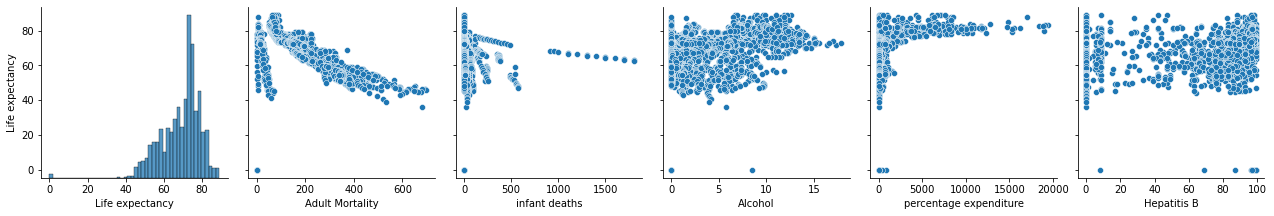

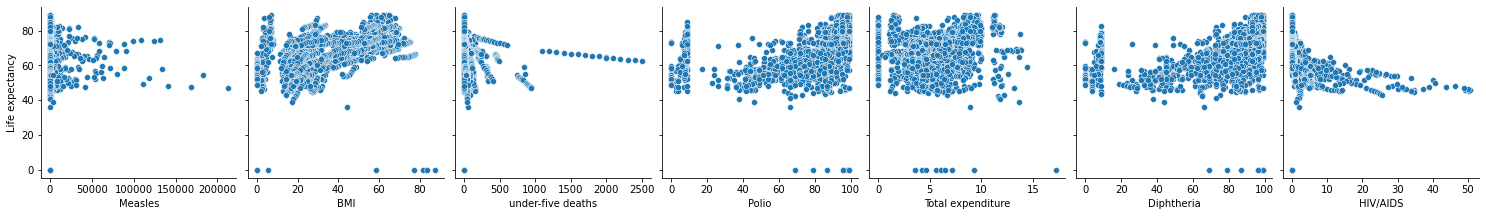

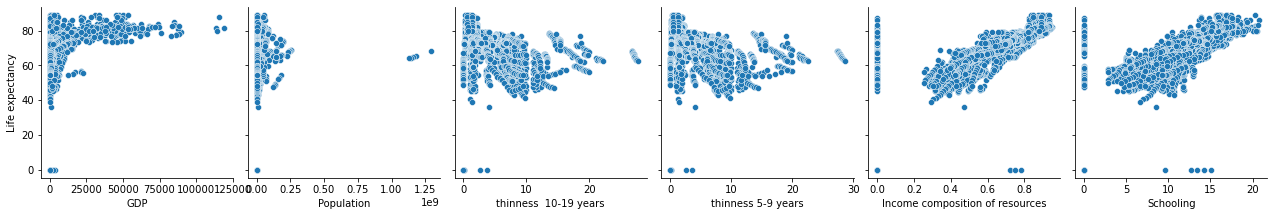

In [7]:
sns.pairplot(df_num, height=3, y_vars = 'Life expectancy', x_vars = df_num.columns[0:6], kind='scatter')
sns.pairplot(df_num, height=3, y_vars = 'Life expectancy', x_vars = df_num.columns[6:13], kind='scatter')
sns.pairplot(df_num, height=3, y_vars = 'Life expectancy', x_vars = df_num.columns[13:], kind='scatter')


De las graficas anteriores vemos que unos buenos candidatos son:
* schooling
* Income composition of resources
* adult mortality

### Búsqueda de relaciones entre variables (Matriz de correlaciones)

Buscamos cuales de las columnas tienen una *relacion* con danceability pero ahora usando correlaciones

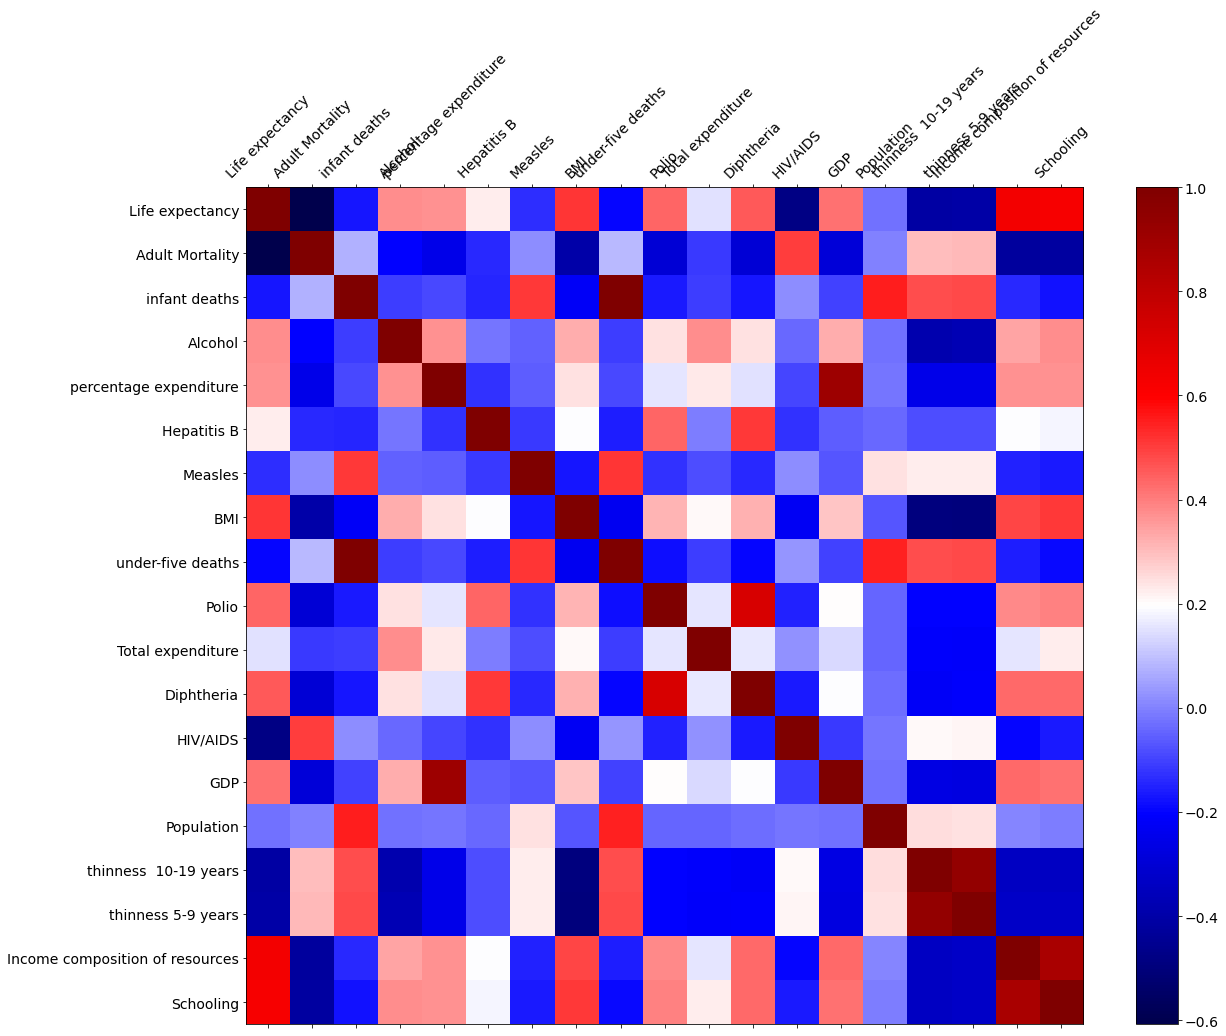

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_num.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_num.select_dtypes(['number']).shape[1]), df_num.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

# Preparación de datos

# Calidad y limpieza de Datos:
  * Completitud
  * Duplicados
  * Consistencia
  * Estandarización

## 1 Completitud

Buscar registros con valores faltantes y decidir, desde el contexto del negocio, que se puede hacer con ellos. Por lo general podemos:
* Eliminar
* Reemplazar

In [9]:
# Ver el numero de atributos vacios
df_num.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Como se puede observar no hay datos nulos por eliminar.

## 2. Duplicidad
Identificar las filas que tienen valores idénticos, ya sea en todas sus columnas o en aquellas que deben tener valores únicos, como lo puede ser el identificador o alguna combinación única de columnas

In [10]:
df_num.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

#Eliminamos datos repetidos
#df_copy = df_copy.drop_duplicates()

Life expectancy  Adult Mortality  infant deaths  Alcohol  \
0                65.0            263.0             62     0.01   
1                59.9            271.0             64     0.01   
2                59.9            268.0             66     0.01   
3                59.5            272.0             69     0.01   
4                59.2            275.0             71     0.01   
...               ...              ...            ...      ...   
2639             72.5            147.0              0     1.08   
2640             72.6            145.0              0     1.10   
2641             72.5            146.0              0     2.05   
2642             72.4            148.0              0     1.79   
2643             72.3             15.0              0     1.57   

      percentage expenditure  Hepatitis B  Measles   BMI  under-five deaths  \
0                  71.279624         65.0     1154  19.1                 83   
1                  73.523582         62.0      492  18.6                 86   
2                  73.219243         64.0      430  18.1                 89   
3                  78.184215         67.0     2787  17.6                 93   
4                   7.097109         68.0     3013  17.2                 97   
...                      ...          ...      ...   ...                ...   
2639                4.783806         84.0        0  72.1                  0   
2640              569.625504         84.0        0  71.5                  0   
2641              568.869281         87.0        0   7.8                  0   
2642              503.588196         89.0        0   7.1                  0   
2643              689.944022         89.0        0  69.4                  0   

      Polio  Total expenditure  Diphtheria  HIV/AIDS          GDP  Population  \
0       6.0               8.16        65.0       0.1   584.259210  33736494.0   
1      58.0               8.18        62.0       0.1   612.696514    327582.0   
2      62.0               8.13        64.0       0.1   631.744976  31731688.0   
3      67.0               8.52        67.0       0.1   669.959000   3696958.0   
4      68.0               7.87        68.0       0.1    63.537231   2978599.0   
...     ...                ...         ...       ...          ...         ...   
2639   86.0               4.67        84.0       0.1    37.846563      1364.0   
2640   88.0               5.13        86.0       0.1  3392.647430       135.0   
2641   88.0               5.82        87.0       0.1  2932.315883     12357.0   
2642   89.0               5.61        88.0       0.1  2892.522663     11689.0   
2643    9.0               6.52        89.0       0.1  2594.749990      1141.0   

      thinness  10-19 years  thinness 5-9 years  \
0                      17.2                17.3   
1                      17.5                17.5   
2                      17.7                17.7   
3                      17.9                18.0   
4                      18.2                18.2   
...                     ...                 ...   
2639                    0.1                 0.1   
2640                    0.1                 0.1   
2641                    0.1                 0.1   
2642                    0.1                 0.1   
2643                    0.1                 0.1   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2639                            0.703       14.5  
2640                            0.698       14.5  
2641                            0.698       14.5  
2642                            0.695       14.6  
2643                            0.694       14.6  

[2644 rows x 19 columns]

No hubo filas repetidas por eliminar.

## 3. Consistencia
Revisar que:
* No se tengan difrentes cadenas o numeros para la misma categoria en una columna con valores categóricos.
* Que los números dentro de una columna categórica pertenezcan a un rango establecido.
* Que las fechas de una columna se encuentren dentro de un rango de fechas establecido.


Esto solo se hara para las variables seleccionadas.

* schooling
* Income composition of resources
* adult mortality

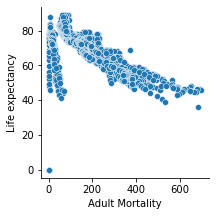

In [11]:
sns.pairplot(df_num, height=3, y_vars = 'Life expectancy', x_vars = df_num.columns[1], kind='scatter')

Se decide borrar el valor 0 ya que este puede afectar la construcción de la regresión.

In [12]:
df_num = df_num.loc[(df_num["Adult Mortality"] >= 60) ]
df_tracks= df_tracks.loc[(df_tracks["Adult Mortality"] >= 60) ]

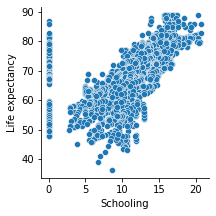

In [13]:
sns.pairplot(df_num, height=3, y_vars = 'Life expectancy', x_vars = df_num.columns[18], kind='scatter')

In [14]:
#Eliminar datos atípicos,
#La calidad debe estar entre 0 y 10
df_num[df_num['Schooling']<= 0].count()

Life expectancy                    125
Adult Mortality                    125
infant deaths                      125
Alcohol                            125
percentage expenditure             125
Hepatitis B                        125
Measles                            125
BMI                                125
under-five deaths                  125
Polio                              125
Total expenditure                  125
Diphtheria                         125
HIV/AIDS                           125
GDP                                125
Population                         125
thinness  10-19 years              125
thinness 5-9 years                 125
Income composition of resources    125
Schooling                          125
dtype: int64

In [15]:

df_num = df_num.loc[(df_num["Schooling"] >= 1) ]
df_tracks= df_tracks.loc[(df_tracks["Schooling"] >= 1) ]

Se decide borrar el valor 0 ya que este puede afectar la construcción de la regresióny son muy pocos

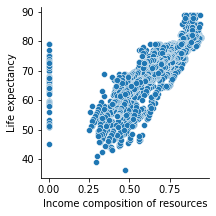

In [16]:
sns.pairplot(df_num, height=3, y_vars = 'Life expectancy', x_vars = df_num.columns[17], kind='scatter')

In [17]:
#Eliminar datos atípicos,
#La calidad debe estar entre 0 y 10
df_num[df_num['Income composition of resources']<= 0].count()


Life expectancy                    64
Adult Mortality                    64
infant deaths                      64
Alcohol                            64
percentage expenditure             64
Hepatitis B                        64
Measles                            64
BMI                                64
under-five deaths                  64
Polio                              64
Total expenditure                  64
Diphtheria                         64
HIV/AIDS                           64
GDP                                64
Population                         64
thinness  10-19 years              64
thinness 5-9 years                 64
Income composition of resources    64
Schooling                          64
dtype: int64

In [18]:

df_num = df_num.loc[(df_num["Income composition of resources"] >= 0.1) ]
df_tracks = df_tracks.loc[(df_tracks["Income composition of resources"] >= 0.1) ]

## 4.Regresión Básica
Realizamos una regresión básica y luego la utilizamos para asignar la columna *danceability* de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

In [24]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['Income composition of resources','Schooling','Adult Mortality']

##pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)]),),]


In [25]:
# Decalra el pipeline
pipeline = Pipeline(steps=[
    ('data_preprocessing', ColumnTransformer([
        ("selector", "passthrough", selected_cols)
    ], remainder="drop")),
    ('data_scaling', StandardScaler()),
    ('num_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('model', LinearRegression()),
    ])

In [33]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df_tracks.drop('Life expectancy', axis = 1)
y = df_tracks['Life expectancy']

pipeline = pipeline.fit(X,y)

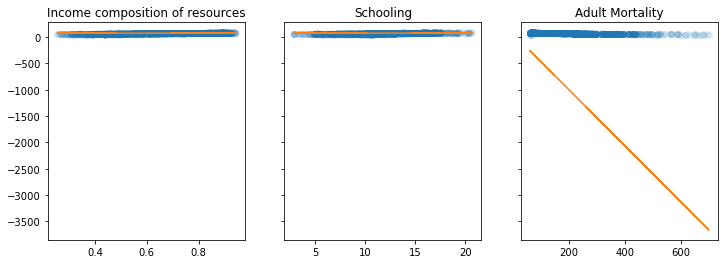

In [27]:
# Visualizamos la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

## 5. Exportar e Importar el Modelo 

In [29]:
# Usamos la lbreria joblib
filename = r'C:\Users\peluc\workspace\Notebooks\BI\Lab4\pipelinelab4.joblib'
# Se guarda
dump(pipeline, filename) 

['C:\\Users\\peluc\\workspace\\Notebooks\\BI\\Lab4\\pipelinelab4.joblib']

In [30]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Income composition of '
                                                   'resources',
                                                   'Schooling',
                                                   'Adult Mortality'])])),
                ('data_scaling', StandardScaler()),
                ('num_imputer', SimpleImputer()),
                ('model', LinearRegression())])

In [34]:
# Clasificamos los datos recientes
df_tracks['Life expectancy'] = p2.predict(X)

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

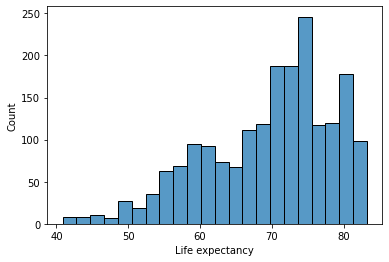

In [35]:
sns.histplot(df_tracks['Life expectancy'])

## Coeficientes

Los coeficientes de la regresión nos pueden dar información sobre la relación entre las variables observadas y la variable objetivo.

**Recuerde** La validez de estos coeficientes depende de que se cumplan correctamente las suposiciones de una regresión lineal.

In [36]:
pipeline['model'].coef_

array([ 3.90762633,  0.22785528, -5.33522415])

In [37]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

columns      coef
0  Income composition of resources  3.907626
1                        Schooling  0.227855
2                  Adult Mortality -5.335224

Note que **NO** hemos transformado las variables observadas. ¿Que sucede con los coeficientes si las columnas no se encuentran todas en la misma escala?

In [38]:
# Vuelve a imprimir los coeficientes
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

columns      coef
0  Income composition of resources  3.907626
1                        Schooling  0.227855
2                  Adult Mortality -5.335224

### 7.1 Coeficiente de Determinación $R^2$

La primera métrica que tenemos es el coeficiente de determinación ($R^2$). Este valor indica que porcentaje de la varianza en la variable objetivo se puede explicar con las variables observadas. Este se define como:
$$ R^2 =  1 - \frac{\sum_{i=1}^{n} (y_i - f_i)^2}{\sum_{i=1}^{n} (y_i - \hat{y})^2}$$

donde $y_i$ es el elemento $i$ de la varaible objetivo, $f_i$ el elemento i de los valores predecidos y:

$$ \hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} $$

In [39]:
p2.score(X,y)

1.0

### 7.2 Root-Mean-Square Error (RMSE) 
La segunda medida es la raiz del error cuadrático medio, definido como:

$$ RSME = \sqrt{\frac{\sum_{i=1}^{n} (y_i - f_i)^2}{n}} $$

In [40]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

0.0

## 8. Supuestos de la Regresión Lineal

### 8.1 Colinealidad
Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad. La forma mas sencilla de hacer esto es con la matriz de correlación

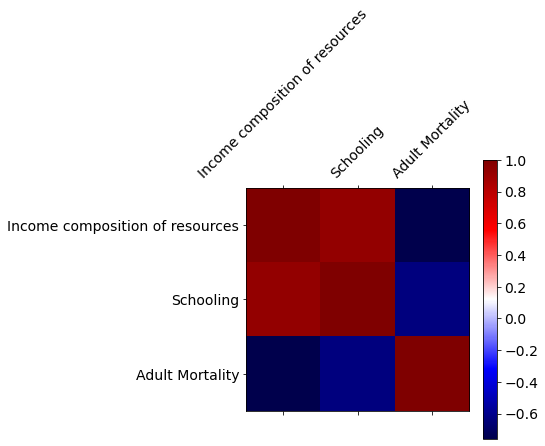

In [41]:
df_temp = df_tracks[selected_cols]


f = plt.figure(figsize=(5, 5))
plt.matshow(df_temp.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_temp.select_dtypes(['number']).shape[1]), df_temp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

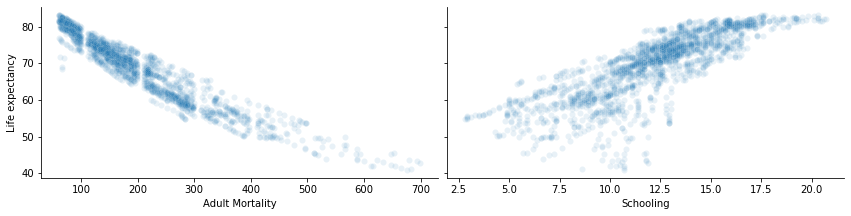

In [42]:
sns.pairplot(df_tracks, height=3, aspect = 2, y_vars = 'Life expectancy', x_vars = ['Adult Mortality','Schooling'], kind='scatter', plot_kws = {'alpha':0.1})